 #                                                **Exploring Breathcode data**

### Importing necessary libraries

In [1]:
pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 110.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 126.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.8/500.8 kB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 110.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 122.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 133.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 130.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the data

In [3]:
data = pd.read_csv('../sources/All_Form_Entries.csv', dtype={'utm_content': 'object', 'current_download': 'object', 'state': 'object', 'lead_type': 'object', 'lead_generation_app':'object'})

/tmp/ipykernel_1381/3606296293.py:1: DtypeWarning: Columns (24,28,41,42,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../sources/All_Form_Entries.csv', dtype={'utm_content': 'object', 'current_download': 'object', 'state': 'object', 'lead_type': 'object', 'lead_generation_app':'object'})


## Data Cleaning

**Changing column type of date columns**

In [4]:
data['created_at'].head()

0    2020-11-28 07:46:58.469198+00:00
1    2021-06-22 04:29:19.572742+00:00
2    2022-04-19 02:00:13.390512+00:00
3    2020-09-23 21:22:11.861392+00:00
4    2020-09-24 04:36:26.286289+00:00
Name: created_at, dtype: object

In [5]:
#Changing type of 3 datetime columns 

data[['created_at','updated_at','won_at']] = data[['created_at','updated_at','won_at']].apply(pd.to_datetime).copy()

In [6]:
data['created_at'] = data['created_at'].dt.strftime("%Y-%m-%d %H:%M:%S")
data['updated_at'] = data['updated_at'].dt.strftime("%Y-%m-%d %H:%M:%S")
data['won_at'] = data['won_at'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [7]:
data[['created_at','updated_at','won_at']] = data[['created_at','updated_at','won_at']].apply(pd.to_datetime).copy()

In [8]:
#The column of our interest is 'Created_at' so we'll convert and separate that one first

data['year-month'] = data['created_at'].dt.strftime('%Y-%m')
data['created_time'] = data['created_at'].dt.strftime('%H:%M:%S')

**Create a full name column**

In [9]:
#Combine first and last name ignoring nulls
data['fullname'] = data['first_name'].fillna('') + str(' ') + data['last_name'].fillna('')

In [10]:
# shift column 'Fullname' to first position
fourth_column = data.pop('fullname')

# insert column using insert(position,column_name,fourth_column) function
data.insert(3, 'fullname', fourth_column)

**Dropping columns with 100% of null values and also non relevant columns**

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:264: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  curves.iloc[:, cols] = (curves
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<Figure size 1500x1500 with 0 Axes>

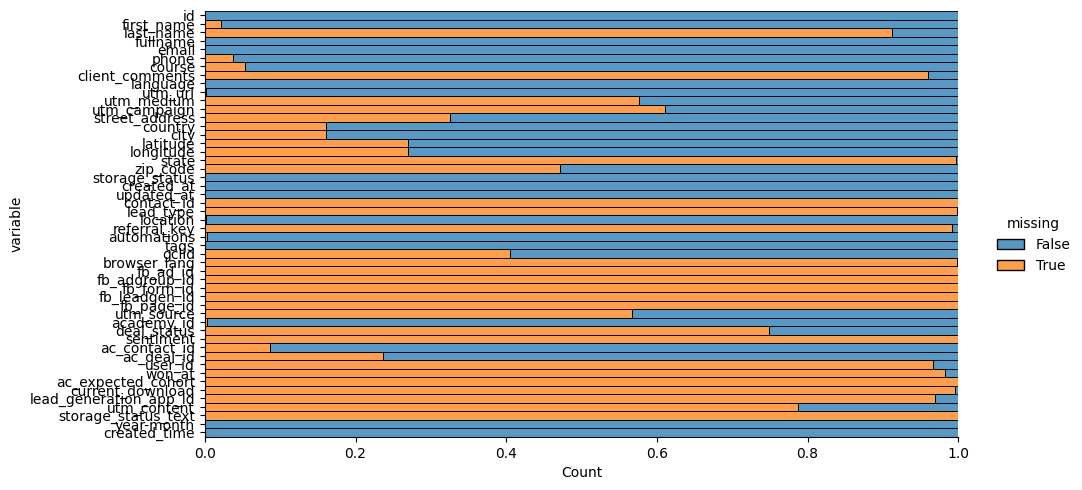

In [11]:
plt.figure(figsize=(15,15))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.show()

In [12]:
#Let's drop columns that have all null values.

data.dropna(axis=1, how='all', inplace=True)

In [13]:
#Let's also drop not relevant columns.

data = data.drop(['phone','client_comments','street_address','city','latitude','longitude','state',
                  'zip_code','referral_key','browser_lang','ac_expected_cohort','current_download','utm_content',
                  'storage_status','user_id','ac_contact_id','first_name','last_name','storage_status_text'], axis=1).copy()

In [14]:
#Dropping rows that were only for test (identify the rest of test emails pending)
data.drop(data[data['utm_source'] == 'test_s'].index, inplace = True)
data.drop(data[data['utm_source'] == 'fintech'].index, inplace = True)

In [15]:
#some test rows identified
data = data[data["email"].str.contains("@4geeks") == False]

**Reduce dataframe to only one application (first) per email, and combine with duplicated (if so)**

In [16]:
#How many unique emails are there in the dataset?
data['email'].nunique()

37006

**Testing the removal and combination of duplicates**

In [17]:
# Creating a duplicates dataframe to try different methods to combine data

duplicateRowsDF = data[data.duplicated(['email'],keep= False)]
print("All Duplicate Rows based on email:"," ", duplicateRowsDF.shape)

duplicateRowsDF.groupby(['email','created_at','utm_medium','utm_source']).size()

All Duplicate Rows based on email:   (19952, 24)


email                         created_at           utm_medium  utm_source 
02sergioconde@gmail.com       2021-11-02 01:19:40  cpc         google         1
123malber.olivares@gmail.com  2022-05-08 02:08:10  ppc         fb             1
                              2022-06-24 02:39:59  ppc         fb             1
1928nathalia@gmail.com        2022-02-14 22:58:04  cpc         google         1
                              2022-02-14 23:00:52  cpc         google         1
                                                                             ..
zuberlye@gmail.com            2022-03-02 20:25:26  ppc         ig             1
zuluaganeider@gmail.com       2022-04-27 19:16:07  cpc         google         1
                              2022-04-27 19:32:06  cpc         google         1
zumanzuesaubrey29@gmail.com   2022-05-17 14:52:29  referral    careerkarma    1
                              2022-05-17 14:54:14  cpc         google         1
Length: 6041, dtype: int64

In [18]:
duplicateRowsDF = duplicateRowsDF.replace("Nan", np.nan)

# Option 1

data1 = duplicateRowsDF.sort_values("created_at")


In [19]:
data1.head(7)

,id,fullname,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,tags,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time
32,99,Patricia Sanchez,2231valemati@gmail.com,full-stack,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,NaN,Venezuela,2020-09-22 11:28:12,...,request_more_info,NaN,NaN,1.0,NaN,NaN,NaT,NaN,2020-09,11:28:12
46,100,Patricia Sanchez,2231valemati@gmail.com,NaN,es,https://4geeksacademy.co/es/aplica,NaN,NaN,Venezuela,2020-09-22 11:54:39,...,website-lead,NaN,NaN,8.0,NaN,NaN,NaT,NaN,2020-09,11:54:39
13,106,Annelis Fuenmayor,annelisfuenmayor@gmail.com,full-stack,es,https://4geeksacademy.co/us/apply,NaN,NaN,Chile,2020-09-22 13:07:16,...,website-lead,NaN,NaN,5.0,NaN,NaN,NaT,NaN,2020-09,13:07:16
49,107,Anne F,annelisfuenmayor@gmail.com,software-engineering,es,https://4geeksacademy.co/us/apply,NaN,NaN,Chile,2020-09-22 13:07:38,...,website-lead,NaN,NaN,5.0,NaN,NaN,NaT,NaN,2020-09,13:07:38
51,112,Patricia Sanchez,2231valemati@gmail.com,full-stack,es,https://4geeksacademy.co/es/aplica,NaN,NaN,Venezuela,2020-09-22 15:30:37,...,website-lead,NaN,NaN,8.0,NaN,NaN,NaT,NaN,2020-09,15:30:37
7,114,Patricia Sanchez,2231valemati@gmail.com,full-stack,es,https://4geeksacademy.co/es/aplica,NaN,NaN,NaN,2020-09-22 17:16:51,...,website-lead,NaN,NaN,7.0,NaN,NaN,NaT,NaN,2020-09,17:16:51
33,115,Patricia Sanchez,2231valemati@gmail.com,NaN,es,https://4geeksacademy.co/us/location/online-re...,NaN,NaN,Venezuela,2020-09-22 17:17:38,...,request_more_info,NaN,NaN,1.0,NaN,NaN,NaT,NaN,2020-09,17:17:38


In [20]:
data1 = data1.groupby("email").first().reset_index()
data1.head()

,email,id,fullname,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,tags,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time
0,010.sergio@gmail.com,982,Sergio,software-engineering,es,https://4geeksacademy.co/es/course/ingenieria-...,None,None,Remoto,2020-11-05 22:43:38,...,request_more_info,Cj0KCQiA7qP9BRCLARIsABDaZzjSqM5HLJ_mnXJR0chAmh...,None,7.0,None,NaN,NaT,NaN,2020-11,22:43:38
1,02sergioconde@gmail.com,15671,Sergio,full-stack,en,https://4geeksacademy.com/es/aplica,cpc,12321016929,Spain,2021-11-02 01:19:40,...,website-lead,CjwKCAjwoP6LBhBlEiwAvCcthEg_m41UBa1VgX4neAax9f...,google,6.0,LOST,29045.0,NaT,NaN,2021-11,01:19:40
2,07.ebad@gmail.com,40414,Ebad Abid,full-stack,en,https://4geeksacademy.com/us/apply,None,None,France,2022-06-29 16:41:53,...,website-lead,None,None,4.0,None,57652.0,NaT,NaN,2022-06,16:41:53
3,0wenbartlet@gmail.com,17693,Owen bartlett,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,None,None,Mexico,2021-11-30 21:16:31,...,request_more_info,None,None,7.0,None,30652.0,NaT,NaN,2021-11,21:16:31
4,10903alm@gmail.com,11875,Alpheus Legoke Mokgalaka,machine-learning-engineering,us,https://4geeksacademy.com/us/landing/scholarsh...,None,None,France,2021-09-14 19:07:17,...,website-lead,None,landingjobs?utm_medium=machine-learning-engine...,10.0,LOST,25851.0,NaT,NaN,2021-09,19:07:17


In [21]:
data1[data1['email']== 'afuenmayor@4geeks.co']

,email,id,fullname,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,tags,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time


**Implementing the removal and combination of duplicates**

In [22]:
data = data.replace("Nan", np.nan).copy()
data = data.sort_values("created_at").copy()
data = data.groupby("email").first().reset_index()

In [23]:
data.shape

(37006, 24)

--------> **a way to discover where do utm_source strange labels belong to:** 

In [24]:
data[data['utm_source'] =='clubhouse']['utm_medium']

1604    None
Name: utm_medium, dtype: object

**--------> a way to discover where do utm_medium strange labels belong to:**

In [25]:
data[data['utm_source'] =='clubhouse']

,email,id,fullname,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,tags,gclid,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time
1604,Zakaria.amine95@gmail.com,39526,Zakaria,full-stack,en,https://4geeksacademy.com/us/apply,None,None,France,2022-06-25 17:38:47,...,website-lead,None,clubhouse,10.0,None,56836.0,NaT,NaN,2022-06,17:38:47


**Let's identify if a lead has gclid assigning 1 for True, and 0 for False.**

In [26]:
data['has_gclid'] = np.where(data['gclid'].isnull(), '0', '1')

In [27]:
data['has_gclid'].value_counts()

1    24172
0    12834
Name: has_gclid, dtype: int64

**Fixing Courses**

In [28]:
data['course'].value_counts()

full-stack                      30725
software-engineering             1834
machine-learning-engineering     1694
full-stack-ft                    1277
machine-learning                   80
node-js                            42
full_stack                          9
machine-learning-enginnering        2
coding-introduction                 1
Name: course, dtype: int64

In [29]:
data['course'] = data['course'].replace(['full-stack-ft', 'full_stack', 'full-stack,software-engineering',
                                         'coding-introduction','outcomes'], 'full-stack')

In [30]:
data['course'] = data['course'].replace(['machine-learning', 'machine-learning-enginnering'], 
                                        'machine-learning-engineering')

In [31]:
data['course'].value_counts()

full-stack                      32012
software-engineering             1834
machine-learning-engineering     1776
node-js                            42
Name: course, dtype: int64

**4. Location**

Let's correct the 2 different typings in Maracaibo and Cortijos

In [32]:
data['location'] = data['location'].replace(['maracaibo'], 'maracaibo-venezuela')

In [33]:
data['location'] = data['location'].replace(['los-cortijos-caracas'], 'caracas-venezuela')

In [34]:
data['location'] = data['location'].replace(['lisboa-portugal'], 'lisbon-portugal')

In [35]:
data['location'].value_counts()

caracas-venezuela        6412
santiago-chile           6044
madrid-spain             5680
downtown-miami           3699
bogota-colombia          3148
online                   3136
costa-rica               2839
europe                   2189
buenosaires-argentina     958
orlando                   939
mexicocity-mexico         838
quito-ecuador             255
panamacity-panama         183
montevideo-uruguay        183
sanjose-uruguay           147
toronto-canada             55
barcelona-spain            51
malaga-spain               31
munich-germany             28
berlin-germany             25
valencia-spain             24
lapaz-bolivia              23
lima-peru                  21
rome-italy                 14
lisbon-portugal            12
maracaibo-venezuela         6
hamburg-germany             6
dublin-ireland              3
milan-italy                 2
Name: location, dtype: int64

**Fixing Language**

Consider 'us' language inside 'en' for english.

In [36]:
data['language'].value_counts()

en    17494
es    14139
us     5373
Name: language, dtype: int64

In [37]:
data['language'] = data['language'].replace('us', 'en')

In [38]:
data['language'].value_counts()

en    22867
es    14139
Name: language, dtype: int64

**Fixing Academy_id**

In [39]:
data['academy_id'] = np.where((data['location'] == 'maracaibo-venezuela'),
                                2.0, data['academy_id'])
data['academy_id'] = np.where((data['location'] == 'toronto-canada'),
                                4.0, data['academy_id'])
data['academy_id'] = np.where((data['location'] == 'costa-rica') |
                                (data['location'] == 'sanjose-uruguay'),
                                7.0, data['academy_id'])

**Fixing utm_source**

In [40]:
data['utm_source'].value_counts()

google                                                 7282
instagram                                              2468
facebook                                               2203
ig                                                     1803
fb                                                     1581
careerkarma                                            1423
landingjobs?utm_medium=machine-learning-engineering     538
coursereport                                            209
Facebook ads                                            131
aprendemas                                              123
landingjobs?utm_medium=full-stack                       115
zoho_recruite                                            81
Facebook                                                 71
facebook_instagram                                       55
bing                                                     48
ActiveCampaign                                           45
landingjobs?utm_medium=RRSS             

In [41]:
#Before making any changes, we should make sure where do those long numbers belong to: instagram or facebook?

pd.options.display.max_rows = 200
data.groupby(['utm_source','utm_medium']).size()

utm_source                                           utm_medium                                    
23848557212380143                                    Instagram_Stories                                    1
23848655532190143                                    Facebook_Mobile_Feed                                 1
23849317251630143                                    Instagram_Feed                                       1
23850705303260143                                    Facebook_Mobile_Feed                                 1
23850859670310143                                    Facebook_Mobile_Feed                                 1
4geeks                                               rrss                                                22
ActiveCampaign                                       email                                               45
Business Manager IG                                  lead gen                                             2
CourseReport                        

**First Conditional assignations**

In [42]:
data['utm_medium'] = np.where((data['utm_source'] == 'Facebook ads') |
                                (data['utm_source'] == 'Facebook_Marketplace') |
                                (data['utm_source'] == 'Facebook_Mobile_Feed') |
                                (data['utm_source'] == 'facebook_awareness') |
                                (data['utm_source'] == 'Facebook_Stories') |
                                (data['utm_source'] == 'Facebook_Desktop_Feed') |
                                (data['utm_source'] == 'Business Manager IG') |
                                (data['utm_source'] == 'Instagram_Feed') |
                                (data['utm_source'] == 'Instagram_Stories'),
                                'cpc', data['utm_medium'])

data['utm_source'] = np.where((data['utm_medium'] == 'Instagram_Stories') |
                                (data['utm_medium'] == 'Instagram_Feed'),
                                'instagram', data['utm_source'])

data['utm_source'] = np.where((data['utm_medium'] == 'Facebook_Mobile_Feed'),
                                'facebook', data['utm_source'])

**Fixing utm_source spelling**

In [43]:
#Fixing spelling of sources in utm_source

data['utm_source'] = data['utm_source'].replace('LInkedin', 'linkedin')
data['utm_source'] = data['utm_source'].replace('CourseReport', 'coursereport')
data['utm_source'] = data['utm_source'].replace(['landingjobs?utm_medium=machine-learning-engineering',
                                            'landingjobs?utm_medium=full-stack', 'landingjobs?utm_medium=RRSS'],
                                            'landingjobs')
data['utm_source'] = data['utm_source'].replace('google_ads', 'google')
data['utm_source'] = data['utm_source'].replace(['Business Manager IG', 'Instagram_Feed', 'ig', 'Instagram_Stories'], 'instagram')
data['utm_source'] = data['utm_source'].replace(['Facebook', 'Facebook ads', 'Facebook_Marketplace', 'Facebook_Mobile_Feed',
                                            'facebook_instagram', 'fb', 'an', 'facebook_awareness', 'Facebook_Stories',
                                            'Facebook_Desktop_Feed'], 'facebook')
data['utm_source'] = data['utm_source'].replace('4geeks', 'ticjob')

In [44]:
data['utm_source'].value_counts()

google                         7284
instagram                      4293
facebook                       4080
careerkarma                    1423
landingjobs                     682
coursereport                    210
aprendemas                      123
zoho_recruite                    81
bing                             48
ActiveCampaign                   45
ticjob                           40
PR?utm_medium=nota-prensa-1      15
linkedin                          9
python-es                         7
qsd.com                           6
bootcamprankings                  4
hired                             3
hs_email                          3
educaedu                          2
educaweb                          2
clubhouse                         1
youtube                           1
techhub                           1
women-who-code                    1
g                                 1
Name: utm_source, dtype: int64

**8. Fixing utm_medium:** 

Assing 'referral' to all schoolpage values.
    
Assign referral to all landingjob utm_source.
    
Verify with gclid if a medium should be cpc or not.
    
Join cpc with ppc.


In [45]:
data.groupby(['utm_source','utm_medium','has_gclid']).size()

utm_source                   utm_medium                         has_gclid
ActiveCampaign               email                              0              39
                                                                1               6
PR?utm_medium=nota-prensa-1  cpc                                1               1
aprendemas                   referral                           0             120
                                                                1               3
bing                         cpc                                0              48
bootcamprankings             schoolpage                         0               3
                                                                1               1
careerkarma                  referral                           1            1393
                             schoolpage                         0               9
                             schoolpage?utm_source=careerkarma  0              12
coursereport            

In [46]:
data['utm_medium'].value_counts()

cpc                                  9954
ppc                                  5903
referral                             1633
coursereportschoolpage                217
email                                  54
FB paid                                30
rrss                                   22
schoolpage                             15
schoolpage?utm_source=careerkarma      12
Facebook_Mobile_Feed                    8
inscripcion                             6
social                                  3
Instagram_Feed                          2
Instagram_Stories                       2
Inmail                                  1
organic                                 1
event                                   1
affiliate_email                         1
Blog                                    1
Name: utm_medium, dtype: int64

In [47]:
#Making assignations to referral and cpc

data['utm_medium'] = data['utm_medium'].replace(['schoolpage', 'coursereportschoolpage', 'schoolpage?utm_source=careerkarma',
                                    'Blog', 'affiliate_email', 'rrss', 'inscripcion', 'event'], 'referral')
data['utm_medium'] = data['utm_medium'].replace(['ppc', 'FB paid', 'Facebook_Mobile_Feed', 'Instagram_Stories', 'Instagram_Feed'],
                                    'cpc')
data['utm_medium'] = np.where((data['utm_source'] == 'linkedin') & (data['utm_medium'] == 'social'),
                          'cpc', data['utm_medium'])

data['utm_medium'] = np.where((data['utm_source'] == 'linkedin') & (data['utm_medium'] == 'Inmail'),
                          'cpc', data['utm_medium'])

data['utm_medium'] = np.where((data['utm_source'] == 'landingjobs'),
                                'referral', data['utm_medium'])

data['utm_medium'] = np.where((data['utm_source'] == 'careerkarma') & (data['utm_medium'].isnull() == True), 
                          'referral', data['utm_medium'])

data['utm_medium'] = np.where((data['utm_source'] == 'facebook') & (data['utm_medium'].isnull() == True),
                          'cpc', data['utm_medium'])

data['utm_medium'] = np.where((data['utm_source'] == 'zoho_recruite') & (data['utm_medium'] == 'cpc'),
                          'referral', data['utm_medium'])

In [48]:
# change name of null medium

data['utm_medium'] = np.where((data['utm_source'].isnull() == True) & (data['utm_medium'].isnull() == True),
                                'undefined & organic', data['utm_medium'])

# change name of null source

data['utm_source'] = np.where((data['utm_medium'] == 'undefined & organic'),
                                'undefined', data['utm_source'])


In [49]:
data['utm_medium'].value_counts()

undefined & organic    18423
cpc                    15823
referral                2680
email                     54
organic                    1
Name: utm_medium, dtype: int64

**Assign lead_types depending on the tags.**

In [50]:
data['tags'].value_counts()

request_more_info                    21956
website-lead                         13743
newsletter                             598
contact-us                             242
utec-uruguay                           147
request_downloadable                   120
hiring-partner                          82
jobboard-lead                           80
website-lead,blacks-in-technology       20
download_outcome                        15
Name: tags, dtype: int64

In [51]:
data.loc[data['tags'] == 'request_more_info', 'lead_type'] = 'SOFT'
data.loc[data['tags'] == 'website-lead', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'newsletter', 'lead_type'] = 'DISCOVERY'
data.loc[data['tags'] == 'contact-us', 'lead_type'] = 'SOFT'
data.loc[data['tags'] == 'utec-uruguay', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'jobboard-lead', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'hiring-partner', 'lead_type'] = 'OTHER'
data.loc[data['tags'] == 'download_outcome', 'lead_type'] = 'DISCOVERY'
data.loc[data['tags'] == 'website-lead,blacks-in-technology', 'lead_type'] = 'STRONG'
data.loc[data['tags'] == 'request_downloadable', 'lead_type'] = 'DISCOVERY'

In [52]:
data['lead_type'].value_counts()

SOFT         22198
STRONG       13991
DISCOVERY      733
OTHER           82
Name: lead_type, dtype: int64

**Creating new column to determine location integrity**

In [53]:
data['location'].value_counts()

caracas-venezuela        6412
santiago-chile           6044
madrid-spain             5680
downtown-miami           3699
bogota-colombia          3148
online                   3136
costa-rica               2839
europe                   2189
buenosaires-argentina     958
orlando                   939
mexicocity-mexico         838
quito-ecuador             255
panamacity-panama         183
montevideo-uruguay        183
sanjose-uruguay           147
toronto-canada             55
barcelona-spain            51
malaga-spain               31
munich-germany             28
berlin-germany             25
valencia-spain             24
lapaz-bolivia              23
lima-peru                  21
rome-italy                 14
lisbon-portugal            12
maracaibo-venezuela         6
hamburg-germany             6
dublin-ireland              3
milan-italy                 2
Name: location, dtype: int64

In [54]:
LATAM_COUNTRIES = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Uruguay','Venezuela','Belize',
                    'Costa Rica','Cuba','Dominican Republic','El Salvador','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua',
                    'Panama','Saint Lucia','Antigua and Barbuda','Guyana','Suriname','Saint Kitts & Nevis','Bahamas','Barbados',
                    'Trinidad and Tobago','Grenada','St. Vincent & Grenadines','Dominica']

LATAM_LOCATIONS = ['caracas-venezuela','santiago-chile','bogota-colombia','online','costa-rica','buenosaires-argentina','mexicocity-mexico',
                    'quito-ecuador','panamacity-panama','montevideo-uruguay','sanjose-uruguay','lapaz-bolivia','lima-peru',
                    'maracaibo-venezuela']

EUROPE_COUNTRIES = ['Hungary','Belarus','Austria','Serbia','Switzerland','Germany','Holy See','Andorra','Bulgaria','United Kingdom',
                    'France','Montenegro','Luxembourg','Italy','Denmark','Finland','Slovakia','Norway','Ireland','Spain','Malta',
                    'Ukraine','Croatia','Moldova','Monaco','Liechtenstein','Poland','Iceland','San Marino','Bosnia and Herzegovina',
                    'Albania','Lithuania','North Macedonia','Slovenia','Romania','Latvia','Netherlands','Russia','Estonia','Belgium',
                    'Czech Republic','Greece','Portugal','Sweeden']

EUROPE_LOCATIONS = ['madrid-spain','europe','barcelona-spain','malaga-spain','munich-germany','berlin-germany','valencia-spain',
                    'rome-italy','lisbon-portugal','maracaibo-venezuela','hamburg-germany','dublin-ireland','milan-italy','europe']

In [64]:
data['country'] = data['country'].str.lower()
LATAM_COUNTRIES = list(map(str.lower,LATAM_COUNTRIES))
EUROPE_COUNTRIES = list(map(str.lower,EUROPE_COUNTRIES))

In [88]:
correct_location = []

for row in data.itertuples(index=False):
    if str(row.country) in str(row.location):    
        correct_location.append(row.location)
    elif str(row.country) == 'united states':    
        correct_location.append('downtown-miami')
    elif str(row.country) == 'costa rica':    
        correct_location.append('costa-rica')
    elif str(row.country) in LATAM_COUNTRIES: 
        correct_location.append('online')
    elif str(row.country) in EUROPE_COUNTRIES:  
        correct_location.append('europe')        
    else:           
        correct_location.append('No location assigned')

In [89]:
data['correct_location'] = correct_location

In [92]:
data.tail(10)

,email,id,fullname,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,utm_source,academy_id,deal_status,ac_deal_id,won_at,lead_generation_app_id,year-month,created_time,has_gclid,correct_location
36996,zumanzuesaubrey29@gmail.com,34506,Aubrey Stephenson,full-stack,en,careerkarma.com,referral,13665858441,united states,2022-05-17 14:52:29,...,careerkarma,4.0,LOST,52727.0,NaT,3.0,2022-05,14:52:29,1,downtown-miami
36997,zunigalargachajhonbreyner@gmail.com,30255,Jhon breiner Zúñiga largacha,full-stack,es,https://4geeksacademy.com/es/landing/bootcamp-...,undefined & organic,None,chile,2022-04-07 16:21:32,...,undefined,5.0,LOST,49127.0,NaT,NaN,2022-04,16:21:32,1,santiago-chile
36998,zunigasm.ariel@gmail.com,9558,Ariel Zúñiga,software-engineering,en,https://4geeksacademy.com/es/coding-bootcamps/...,undefined & organic,None,chile,2021-08-03 16:02:21,...,undefined,5.0,None,23935.0,NaT,NaN,2021-08,16:02:21,1,santiago-chile
36999,zunigen.serv@gmail.com,44521,Carmen Guerra,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,cpc,13881753802,venezuela,2022-08-04 18:55:19,...,google,2.0,None,61115.0,NaT,NaN,2022-08,18:55:19,1,caracas-venezuela
37000,zuotianyesterday@gmail.com,43496,Victor,full-stack,en,https://4geeksacademy.com/us/apply,undefined & organic,None,chile,2022-07-27 05:31:40,...,undefined,4.0,None,60251.0,NaT,NaN,2022-07,05:31:40,0,online
37001,zurianyeliacevedo28@gmail.com,39771,ZuriiA,full-stack,es,269695430894258,cpc,Leads Mid Year 2022,None,2022-06-26 23:28:10,...,instagram,2.0,None,57070.0,NaT,NaN,2022-06,23:28:10,1,No location assigned
37002,zyenifer@ymail.com,25521,Yenifer Zuniga,full-stack,en,careerkarma.com,referral,None,None,2022-02-22 17:11:04,...,careerkarma,4.0,None,43227.0,NaT,3.0,2022-02,17:11:04,1,No location assigned
37003,zyrivic.montlocs@gmail.com,37919,wilmer gonzalez,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,undefined & organic,None,venezuela,2022-06-14 16:35:34,...,undefined,7.0,None,55516.0,NaT,NaN,2022-06,16:35:34,0,online
37004,zyro.auson@gmail.com,11773,Zyro Kamson,machine-learning-engineering,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,None,france,2021-09-14 18:37:10,...,landingjobs,10.0,None,25755.0,NaT,NaN,2021-09,18:37:10,0,europe
37005,zzhivargo@gmail.com,14144,Zhivargo,full-stack,en,https://4geeksacademy.com/us/landing/coding-cl...,cpc,11032631708,united states,2021-10-10 12:43:04,...,google,4.0,LOST,27784.0,NaT,NaN,2021-10,12:43:04,1,downtown-miami


In [59]:
def create_location(df, column1, column2,new_column):
    if (df[column2].str.contains(df[column1].str.lower(), regex=False) == True):
        df[new_column] = df[column2]
    elif df[column1] in LATAM_COUNTRIES:
        df[new_column] = 'online'
    elif df[column1] in EUROPE_COUNTRIES:
        df[new_column] = 'europe'
    else: 
        df[new_column] = 'no location assigned'

In [60]:
data['create_location'] = create_location(data,'country','location','correct_location')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().